**라이브러리 Import 하기**

In [5]:
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import numpy as np
import matplotlib.pyplot as plt

**X and Y data (given)**

* todo 예1,2,3)

In [8]:
x_train = [1, 2, 3, 4, 5, 6]# 데이터갯수 늘림
y_train = [-2+0.3, 1, 4, 7, 10, 13+0.15] #y=3x-5/ 노이즈 다르게줌

signal_length = len(x_train)
y_noise = np.random.normal(0, 1, signal_length)

y_train = y_train + y_noise

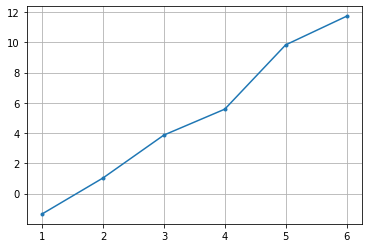

In [9]:
plt.plot(x_train, y_train,'.-')
plt.grid()

**Initialization**

In [10]:
useRandom = False

* todo 예4)

In [12]:
if useRandom:
    W = tf.Variable(tf.random_normal([1]), name='weight')
    b = tf.Variable(tf.random_normal([1]), name='bias')
else:
    w0 = 7.0;# 초기값w0, b0 다르게 설정
    b0 = 5.0;

    W = tf.Variable(w0*tf.ones([1]), name='weight')
    b = tf.Variable(b0*tf.ones([1]), name='bias')

Our hypothesis
$$H(X)=Wx+b$$

In [13]:
hypothesis = x_train * W + b

**cost/loss function 정의하기**
* loss of one training example:
$$loss = \mathcal{L}(\hat{y}, y) = (\hat y^{(i)} - y^{(i)})^2 \tag{1}$$


In [14]:
loss = tf.reduce_mean(tf.square(hypothesis - y_train))

**Optimizer**

In [15]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(loss)

**Launch the graph in a session**

In [16]:
sess = tf.Session()

**Initializes global variables in the graph.**

In [17]:
sess.run(tf.global_variables_initializer())

In [18]:
nb_epoch = 2001
vloss = []
vb =  []
vw = [] 

for step in range(nb_epoch):
    sess.run(train)
    loss1 = sess.run(loss)
    w1 = sess.run(W)[0] # 기울기
    b1 = sess.run(b)[0] # bias
    
    vloss.append(loss1)
    vb.append(b1)
    vw.append(w1)

    if step % 100 == 0: # 100번마다
       
        print(step,'\t', loss1,'\t', w1,'\t',b1)

0 	 306.91183 	 5.0404663 	 4.512327
100 	 5.7946353 	 1.4111844 	 1.1593193
200 	 2.9034016 	 1.7961638 	 -0.48885334
300 	 1.511793 	 2.0632517 	 -1.6323102
400 	 0.84198326 	 2.24855 	 -2.425609
500 	 0.51959103 	 2.3771048 	 -2.9759774
600 	 0.3644166 	 2.4662929 	 -3.3578086
700 	 0.28972834 	 2.528169 	 -3.6227126
800 	 0.2537794 	 2.5710967 	 -3.8064952
900 	 0.23647654 	 2.6008787 	 -3.9339976
1000 	 0.22814842 	 2.6215403 	 -4.0224547
1100 	 0.22413968 	 2.635876 	 -4.0838275
1200 	 0.22221027 	 2.6458206 	 -4.126404
1300 	 0.22128175 	 2.65272 	 -4.155941
1400 	 0.22083466 	 2.657507 	 -4.1764345
1500 	 0.22061948 	 2.6608274 	 -4.1906495
1600 	 0.22051583 	 2.6631312 	 -4.2005143
1700 	 0.22046597 	 2.6647296 	 -4.2073565
1800 	 0.22044206 	 2.665839 	 -4.2121058
1900 	 0.22043043 	 2.6666083 	 -4.2153993
2000 	 0.22042508 	 2.6671422 	 -4.2176847


Text(0, 0.5, 'loss')

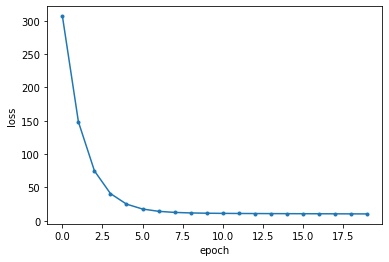

In [19]:
plt.plot(vloss[:20],'.-')
plt.xlabel('epoch')
plt.ylabel('loss')

학습완료

In [20]:
w1 = sess.run(W)[0] # 기울기
b1 = sess.run(b)[0] # bias


출력해보기

In [21]:
print(w1, b1)

2.6671422 -4.2176847


In [22]:
str1 = 'y = ' + str(w1) +'x + ' + str(b1)
print(str1)

y = 2.6671422x + -4.2176847


Text(0.5, 1.0, 'y = 2.6671422x + -4.2176847')

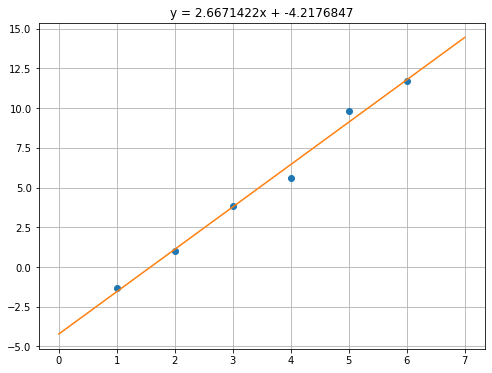

In [32]:
plt.figure(figsize=(8,6)) # figsize를 바꾸어보세요
plt.plot(x_train, y_train,'o') #train data 그리기

# 직선 그래프를 그리기 위한 코드
# 그래프의 x좌표를 일정 간격으로 설정함
x1 = np.linspace(np.min(x_train)-1, np.max(x_train)+1)
y1 = w1*x1 + b1
plt.plot(x1, y1)

plt.grid() # 격자
#plt.axis((np.min(x_train) - 1, np.max(x_train) + 1, np.min(y_train) - 1, np.max(y_train) + 1))
plt.title(str1)

# **R-Squared**

R-squared 란? 모델이 데이터에 얼마나 적합한 지 수치적으로 결정하는 방법입니다. 

In [79]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import random
%matplotlib inline

# **MSE(Mean Squared Error)**

$$ \frac{(실제값-예측값)^2}{데이터수} $$

In [80]:
x=[[1],[2],[3],[4],[5]]
y=[[1],[5],[6],[7],[11]]
y=np.array(y)
x=np.array(x)
mean=(1+5+6+7+11)/5 #데이터의 평균값
print(y)

[[ 1]
 [ 5]
 [ 6]
 [ 7]
 [11]]


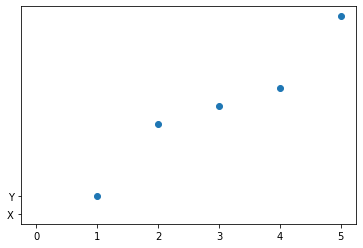

In [81]:
plt.plot(x,y,marker='o',linestyle='')
plt.plot('X')
plt.plot('Y')

In [82]:
lr = LinearRegression()
lr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

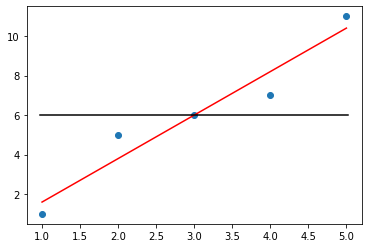

In [83]:
plt.plot(x,y,marker='o',linestyle='')
plt.plot(x,lr.predict(x),color = 'red')
plt.axhline(y=mean, xmin=0.04, xmax=0.96, color = 'black')

In [84]:
mean_squared_error(y, lr.predict(x))

0.7200000000000001

In [85]:
print(lr.predict(x))

[[ 1.6]
 [ 3.8]
 [ 6. ]
 [ 8.2]
 [10.4]]


In [86]:
def myMSE(X,Y,line):
  err=0
  #for i in range (len(X)):     #예측값 MSE구하기
  #    err+=(Y[i][0]-line[i][0])**2

  if (str(type(line)) == "<class 'float'>"): #평균MSE 구하기
      for i in range(len(X)):
          err += (Y[i][0]-line)**2

  else:
      for i in range(len(X)):  #예측값 Mse 구하기
          err +=(Y[i][0]-line[i][0])**2

  MSE = err/len(X)
  return MSE

In [87]:
print("MSE :", myMSE(x,y,lr.predict(x)))

MSE : 0.7200000000000001


# **R squared**

$$ R^2 = 1- \frac{MSE of regression line}{MSEof the average of the data} $$

In [88]:
lr.score(x,y)

0.9307692307692308

In [89]:
def myRsq(X,Y,model):

    #평균구하기
    hap=0
    for i in range(len(X)):
        hap += Y[i][0]
    mean = float(hap/len(X))
    print("평균:", mean)

    #모델 fit 하기 
    model.fit(X,Y)

    #MSE와 R-squared 구하기
    reg_mse=myMSE(X,Y,model.predict(X))
    avg_mse=myMSE(X,Y,mean)
    r=1-(reg_mse/avg_mse)

    #출력
    #print("MSEof regression line:", reg_mse)
    #print("MSE of average line:", avg_mse)
    print( "R-squared:", r)

In [90]:
myRsq(x,y,LinearRegression())

평균: 6.0
R-squared: 0.9307692307692308


# **100개 데이터로 해보기**

# **데이터가 선형 모델에 적합한 경우**

**1. 데이터 만들기**

In [91]:
data=100 #데이터 개수 정하기

In [92]:
#x_train 데이터 만들기
x_train=[]
for i in range(1,data+1):
  x_train.append([i])

x_train=np.array(x_train)
x_train.shape

(100, 1)

In [93]:
#y_train 데이터 만들기
y_train1=[]
for i in range(1,data+1): #y_train에 노이즈 만들어서 넣기
  y_train1.append([i+random.uniform(-20,20)]) #난수발생시켜서 노이즈 만들기
  
y_train1=np.array(y_train1)
y_train1.shape

(100, 1)

Text(0, 0.5, 'Y')

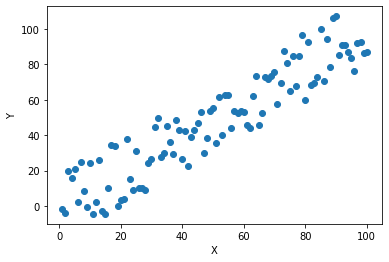

In [94]:
plt.plot(x_train, y_train1, marker='o', linestyle='')
plt.xlabel('X')
plt.ylabel('Y')

**2. 모델에 넣기**

In [95]:
lr.fit(x_train,y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [96]:
#평균값 구하기
mean=0
for i in y_train1:
    for j in i:
        mean+=j
mean=mean/data
print(mean)

48.13556586553031


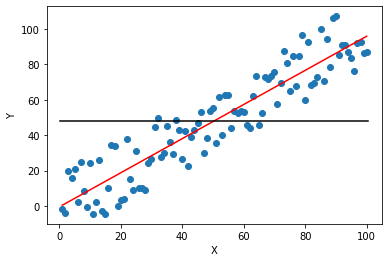

In [97]:
#예측한 값과 평균 그려보기
plt.plot(x_train, y_train1, marker='o', linestyle='')
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(x_train,lr.predict(x_train), color='red')
plt.axhline(y=mean, xmin=0.04, xmax=0.96, color='black')

함수와 내가 만든 함수 비교하기

In [98]:
lr.score(x_train,y_train1)

0.8541423861464071

In [99]:
myRsq(x_train, y_train1, LinearRegression())

평균: 48.13556586553031
R-squared: 0.8541423861464073


**데이터가 선형모델에 부적합한 경우**

In [100]:
y_train2=[]
for i in range(1,data+1): #y_train에 노이즈 만들어서 넣기
    y_train2.append([i+random.uniform(-400,400)]) #난수발생시켜서 노이즈 만들기

y_train2=np.array(y_train2)
y_train2.shape

(100, 1)

Text(0, 0.5, 'Y')

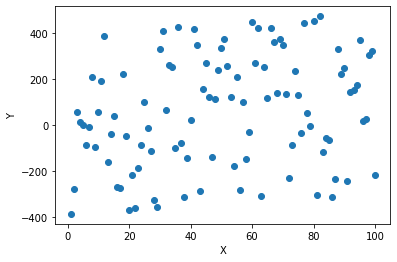

In [101]:
plt.plot(x_train, y_train2, marker='o', linestyle='')
plt.xlabel('X')
plt.ylabel('Y')

In [102]:
mean=0
for i in y_train2:
    for j in i:
        mean += j
mean= mean/data
print(mean)

59.97286622035832


In [103]:
lr.fit(x_train, y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

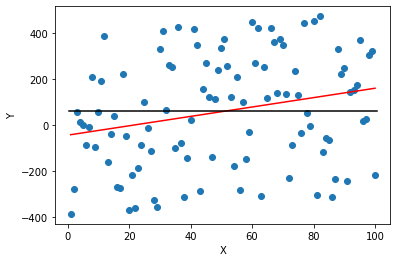

In [104]:
plt.plot(x_train, y_train2, marker='o', linestyle='')
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(x_train, lr.predict(x_train),color='red')
plt.axhline(y=mean, xmin=0.04, xmax=0.96, color='black')

In [105]:
lr.score(x_train, y_train2)

0.05979262970455157

In [106]:
myRsq(x_train,y_train2, LinearRegression())

평균: 59.97286622035832
R-squared: 0.059792629704551126
